In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("churn_data.csv")

# Data General Description

In [3]:
print('dataframe shape: ', df.shape)

dataframe shape:  (10000, 12)


In [4]:
for column_index, (column, dtype) in enumerate(zip(df.columns, df.dtypes)):
  print('column index: ', column_index, ' ,with name: ', column, ' ,and dtype: ', dtype)

column index:  0  ,with name:  CustomerID  ,and dtype:  int64
column index:  1  ,with name:  Geography  ,and dtype:  object
column index:  2  ,with name:  Gender  ,and dtype:  object
column index:  3  ,with name:  Age_Band  ,and dtype:  object
column index:  4  ,with name:  TenureYears  ,and dtype:  int64
column index:  5  ,with name:  EstimatedIncome  ,and dtype:  float64
column index:  6  ,with name:  BalanceEuros  ,and dtype:  float64
column index:  7  ,with name:  NoProducts  ,and dtype:  int64
column index:  8  ,with name:  CreditCardholder  ,and dtype:  int64
column index:  9  ,with name:  CustomerWithLoan  ,and dtype:  int64
column index:  10  ,with name:  Digital_TRX_ratio  ,and dtype:  float64
column index:  11  ,with name:  Inactive  ,and dtype:  int64


In [5]:
unique_id_customers = df['CustomerID'].unique().shape[0]
print('unique id customers: ', unique_id_customers)

unique id customers:  10000


every unique_id appears only once

## Features Summary

2 categorical features: Geography and Age_Band


3 boolean features: Gender, CreditCardholder and CustomerWithLoan


5 numerical features: TenureYears, EstimatedIncome, BalanceEuros, NoProducts,
Digital_TRX_ratio


1 target: Inactive


In [ ]:
for column in df.columns:
  print('unique number of values: ', len(df[column].unique()), ' in column with name: ' , column)

unique number of values:  10000  in column with name:  CustomerID
unique number of values:  3  in column with name:  Geography
unique number of values:  2  in column with name:  Gender
unique number of values:  6  in column with name:  Age_Band
unique number of values:  11  in column with name:  TenureYears
unique number of values:  9999  in column with name:  EstimatedIncome
unique number of values:  6382  in column with name:  BalanceEuros
unique number of values:  4  in column with name:  NoProducts
unique number of values:  2  in column with name:  CreditCardholder
unique number of values:  2  in column with name:  CustomerWithLoan
unique number of values:  137  in column with name:  Digital_TRX_ratio
unique number of values:  2  in column with name:  Inactive


In [ ]:
print('inactive user labels: ', df.loc[df['Inactive']==1].shape[0])
print('active user labels: ', df.loc[df['Inactive']==0].shape[0])

inactive user labels:  2042
active user labels:  7958


## Missing Values

There are no missing values

In [ ]:
df.isnull().sum().sum()

0

# Categorical features

## Geography

In [ ]:
df['Geography'].unique()

array(['Rest_GR', 'Thessaloniki', 'Athens'], dtype=object)

<Axes: ylabel='Geography'>

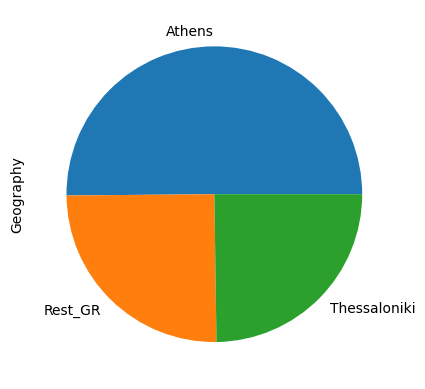

In [10]:
df['Geography'].value_counts(normalize=True).plot.pie()

In [ ]:
rest_gr_df = df.loc[df['Geography']=='Rest_GR']
thessaloniki_df = df.loc[df['Geography']=='Thessaloniki']
athens_df = df.loc[df['Geography']=='Athens']

nr_rest_gr_cases = rest_gr_df.shape[0]
nr_thessaloniki_cases = thessaloniki_df.shape[0]
nr_athens_cases = athens_df.shape[0]

In [ ]:
inactive_users_rest_gr = rest_gr_df[rest_gr_df['Inactive']==1].shape[0]
active_users_rest_gr = rest_gr_df[rest_gr_df['Inactive']==0].shape[0]

inactive_users_thessaloniki = thessaloniki_df[thessaloniki_df['Inactive']==1].shape[0]
active_users_thessaloniki = thessaloniki_df[thessaloniki_df['Inactive']==0].shape[0]

inactive_users_athens = athens_df[athens_df['Inactive']==1].shape[0]
active_users_athens = athens_df[athens_df['Inactive']==0].shape[0]

In [ ]:
print('users in Rest_GR: ', nr_rest_gr_cases)
print('inactive users in Rest GR: ', inactive_users_rest_gr)
print('active users in Rest GR: ', active_users_rest_gr)
print('inactivity ratio in Rest GR: ', inactive_users_rest_gr/nr_rest_gr_cases)
print(" ")
print('users in Thessaloniki: ', nr_thessaloniki_cases)
print('inactive users in Thessaloniki: ', inactive_users_thessaloniki)
print('active users in Thessaloniki: ', active_users_thessaloniki)
print('inactivity ratio in Thessaloniki: ', inactive_users_thessaloniki/nr_thessaloniki_cases)
print(" ")
print('users in Athens: ', nr_athens_cases)
print('inactive users in Athens: ', inactive_users_athens)
print('active users in Athens: ', active_users_athens)
print('inactivity ratio in Athens: ', inactive_users_athens/nr_athens_cases)

users in Rest_GR:  2509
inactive users in Rest GR:  815
active users in Rest GR:  1694
inactivity ratio in Rest GR:  0.3248306098047031
 
users in Thessaloniki:  2477
inactive users in Thessaloniki:  414
active users in Thessaloniki:  2063
inactivity ratio in Thessaloniki:  0.16713766653209527
 
users in Athens:  5014
inactive users in Athens:  813
active users in Athens:  4201
inactivity ratio in Athens:  0.1621459912245712


Users are more likely to be inactive in rest of Greece than in the two biggest cities

## Age Bands

In [13]:
df_age_band = df[['Age_Band', 'Inactive']]
print('unique age bands: ', df_age_band['Age_Band'].unique())

unique age bands:  ['18-25' '65+' '45-55' '25-35' '55-65' '35-45']


We substitute each age band with its median value to calculate pearson correlation

<ipython-input-14-a65eefa566c4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_age_band['Age_Band'])


<Axes: xlabel='Age_Band', ylabel='Density'>

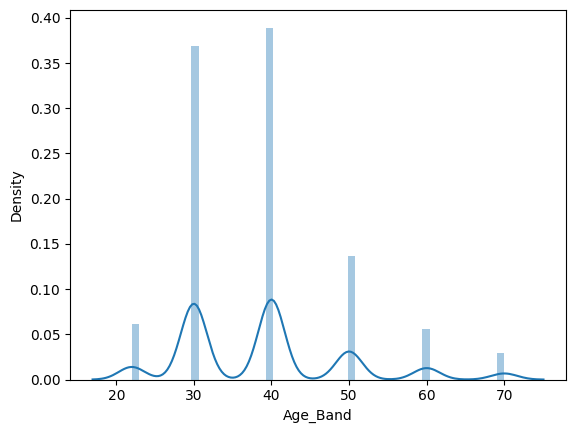

In [14]:
df_age_band.loc[df_age_band['Age_Band'] == '18-25', ['Age_Band']] = 22
df_age_band.loc[df_age_band['Age_Band'] == '25-35', ['Age_Band']] = 30
df_age_band.loc[df_age_band['Age_Band'] == '35-45', ['Age_Band']] = 40
df_age_band.loc[df_age_band['Age_Band'] == '45-55', ['Age_Band']] = 50
df_age_band.loc[df_age_band['Age_Band'] == '55-65', ['Age_Band']] = 60
df_age_band.loc[df_age_band['Age_Band'] == '65+', ['Age_Band']] = 70
df_age_band = df_age_band.astype({'Age_Band':'int'})
df_age_band
sns.distplot(df_age_band['Age_Band'])


In [15]:
df_age_band.corr()

,Age_Band,Inactive
Age_Band,1.000000,0.277297
Inactive,0.277297,1.000000


There is a positive correlation between Age band and Inactive users.

# Boolean Features

## Gender

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: ylabel='Gender'>

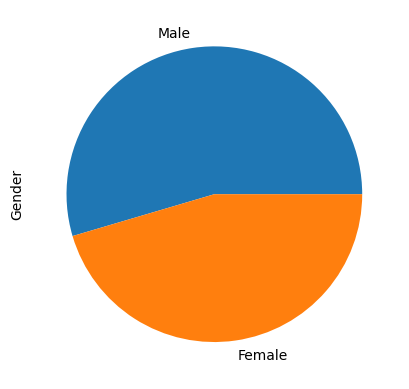

In [18]:
df['Gender'].value_counts(normalize=True).plot.pie()

In [19]:
df_female = df.loc[df['Gender']=='Female']
df_male = df.loc[df['Gender']=='Male']

nr_female_cases = df_female.shape[0]
nr_male_cases = df_male.shape[0]

In [20]:
inactive_users_female = df_female[df_female['Inactive']==1].shape[0]
active_users_female = df_female[df_female['Inactive']==0].shape[0]

inactive_users_male = df_male[df_male['Inactive']==1].shape[0]
active_users_male = df_male[df_male['Inactive']==0].shape[0]

In [21]:
print('female users: ', nr_female_cases)
print('inactive female users: ', inactive_users_female)
print('active female users: ', active_users_female)
print('inactivity female ratio: ', inactive_users_female/nr_female_cases)
print(" ")
print('male users: ', nr_male_cases)
print('inactive male users: ', inactive_users_male)
print('active male users: ', active_users_male)
print('inactivity male ratio: ', inactive_users_male/nr_male_cases)

female users:  4543
inactive female users:  1144
active female users:  3399
inactivity female ratio:  0.25181598062953997
 
male users:  5457
inactive male users:  898
active male users:  4559
inactivity male ratio:  0.16455928165658787


### Estimating Correlation

In [22]:
df_gender = df[['Gender', 'Inactive']]
df_gender.loc[df_gender['Gender'] == 'Female', ['Gender']] = 1
df_gender.loc[df_gender['Gender'] == 'Male', ['Gender']] = 0
df_gender = df_gender.astype({'Gender':'int'})
df_gender.corr()

,Gender,Inactive
Gender,1.000000,0.107775
Inactive,0.107775,1.000000


There is some positive correlation between being female and inactive

## Credit Card Holder

<Axes: ylabel='CreditCardholder'>

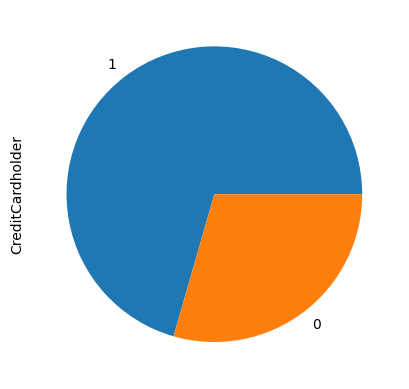

In [24]:
df['CreditCardholder'].value_counts(normalize=True).plot.pie()

In [25]:
df_creditcardholder = df[['CreditCardholder', 'Inactive']]
df_creditcardholder.corr()

,CreditCardholder,Inactive
CreditCardholder,1.000000,-0.007418
Inactive,-0.007418,1.000000


Small correlation between having credict card and being inactive

## Customer with loan

<Axes: ylabel='CustomerWithLoan'>

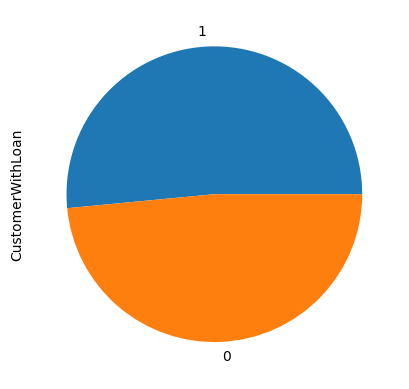

In [28]:
df['CustomerWithLoan'].value_counts(normalize=True).plot.pie()

In [29]:
df_customerwithloan = df[['CustomerWithLoan', 'Inactive']]
df_customerwithloan.corr()

,CustomerWithLoan,Inactive
CustomerWithLoan,1.000000,-0.156272
Inactive,-0.156272,1.000000


There is some negative correlation between having a loan and being inactive.

Having a loan is positively related to being active

# Numerical Features

<Axes: xlabel='TenureYears', ylabel='Count'>

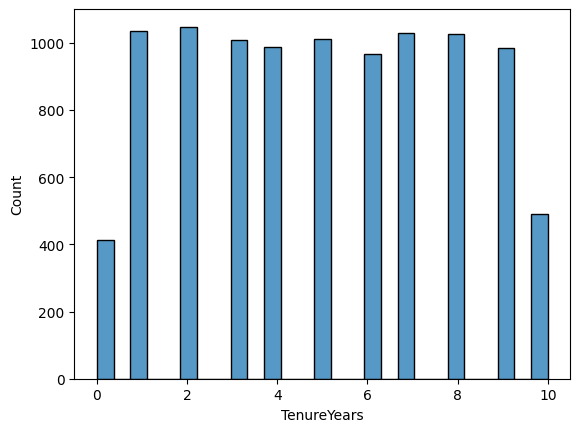

In [34]:
sns.histplot(df['TenureYears'])

<Axes: xlabel='EstimatedIncome', ylabel='Count'>

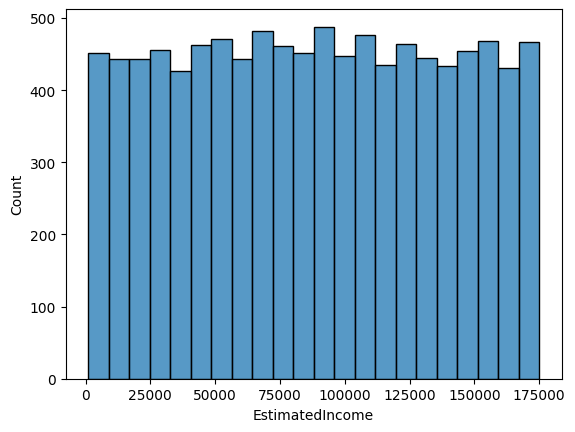

In [35]:
sns.histplot(df['EstimatedIncome'])

<Axes: xlabel='BalanceEuros', ylabel='Count'>

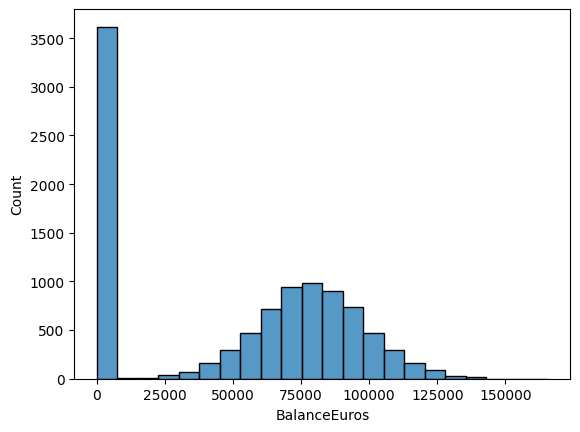

In [36]:
sns.histplot(df['BalanceEuros'])

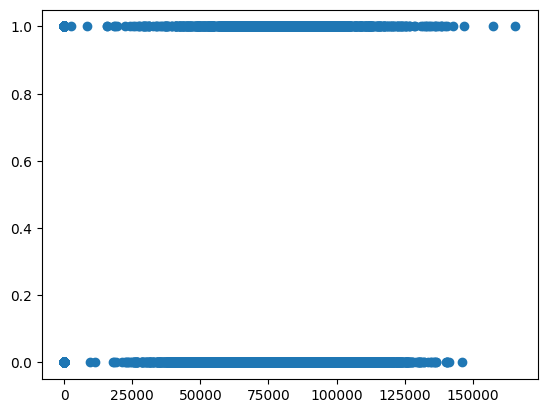

In [38]:
plt.scatter(df['BalanceEuros'], df['Inactive'])

In [42]:
rslt_df = df[df['BalanceEuros'] < 25000]
rslt_df_1 = rslt_df[rslt_df['Inactive']==1]
rslt_df_0 = rslt_df[rslt_df['Inactive']==0]
print('inactive with low balance: ', rslt_df_1.shape[0])
print('active with low balance: ', rslt_df_0.shape[0])

inactive with low balance:  511
active with low balance:  3128


<Axes: xlabel='NoProducts', ylabel='Count'>

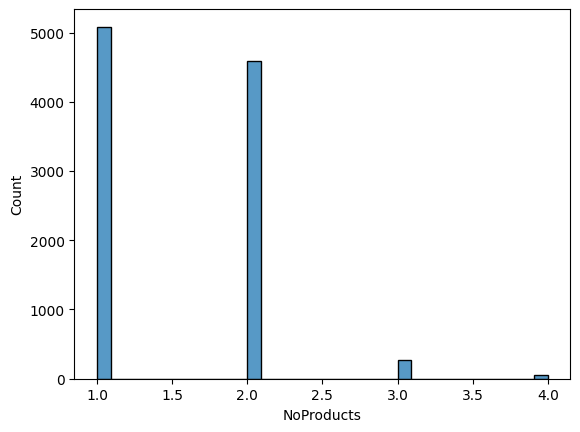

In [43]:
sns.histplot(df['NoProducts'])

<Axes: >

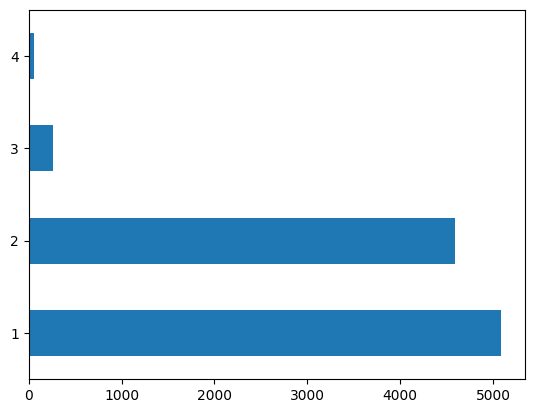

In [46]:
df['NoProducts'].value_counts(normalize=False).plot.barh()

<Axes: xlabel='Digital_TRX_ratio', ylabel='Count'>

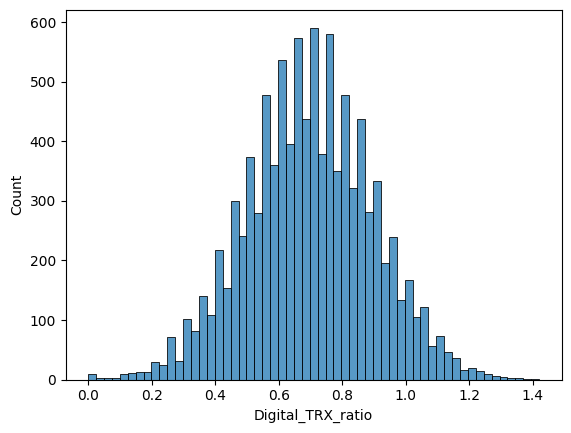

In [47]:
sns.histplot(df['Digital_TRX_ratio'])

## Correlation between features and target

<ipython-input-31-8eb2b2690a57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds')


<Axes: >

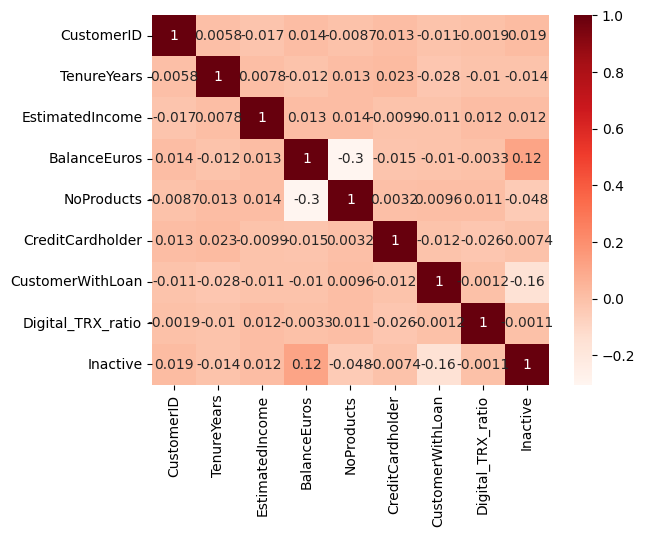

In [31]:
#corr_matrix = df_numerical.corr()
sns.heatmap(df.corr(), annot=True, cmap='Reds')

The target inactive has highest positive correlation with Balance in Euros among the numerical features. The more balance one has, the more likely it is to be inactive.

# Summary

Correlation sorting:

age: 0.277

customer with loan: -0.156

balance: 0.118

gender: 0.108

number of products: -0.048

tenure years: -0.014

estimated income: 0.0122

credit card holder: -0.007

Digital TRX ratio: -0.001




And geography plays important role:

*   inactivity ratio in rest of Greece: 0.32
*   inactivity ratio in Thessaloniki: 0.167
*   inactivity ration in Athens: 0.162